In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


plt.rc('font', size=12)  # Set default font size for all elements
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # X and Y labels font size
plt.rc('xtick', labelsize=12)  # X tick labels font size
plt.rc('ytick', labelsize=12)  # Y tick labels font size
plt.rc('legend', fontsize=10)  # Legend font size
plt.rc('figure', titlesize=12)  # Figure title font size

In [2]:
PATH_TO_RESULTS = '/home/lgierz/BA_MothClassification/data/run_results/cross_validation_tests/'
result_df = pd.read_csv(PATH_TO_RESULTS + 'crossval_bestparams_alldatasets_180runs.csv')

In [17]:

DATASET_CONFIGS = {
    'top277': (277, [3000, 2000, 1000, 500]),
    'top387': (387, [2000, 1000, 500]),
    'top589': (589, [1000, 500])
}

In [18]:
averaged_result_df = result_df.copy()

for metric in ['Validation Accuracies', 'Validation Losses']:

    validations_grouped = result_df[result_df['Model'] == 'Linear Classifier'].groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])[metric]

    for group in validations_grouped:
        # Extract the group key and the series of validation accuracies
        key, val_series = group
        
        # Initialize an array to store the sum of accuracies for each epoch
        avg = np.zeros(1500)
        
        # Iterate over the series and sum the accuracies for each epoch
        for val in val_series:
            avg += np.array(eval(val))
        
        # Calculate the average accuracies by dividing by the number of folds
        avg /= len(val_series)
        avg = np.round(avg, 4)


        # print(f"Group: {key}, Averaged Validation Accuracies: {avg_accs}")

        averaged_result_df.loc[(averaged_result_df['FoundationalModel'] == key[0]) & (averaged_result_df['SpeciesAmount'] == key[1]) & (averaged_result_df['SampleAmount'] == key[2]) & (averaged_result_df['Model'] == key[3]), metric] = str(list(avg))

### Std derivation in between folds

In [ ]:
# averaged_result_df['Std Accuracy'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Accuracy'].transform('std')
# averaged_result_df['Mean Accuracy'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Accuracy'].transform('mean')
# averaged_result_df['Std Precision'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Precision'].transform('std')
# averaged_result_df['Mean Precision'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Precision'].transform('mean')
# averaged_result_df['Std Recall'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Recall'].transform('std')
# averaged_result_df['Mean Recall'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Recall'].transform('mean')
# averaged_result_df['Std F1-Score'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['F1-Score'].transform('std')
# averaged_result_df['Mean F1-Score'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['F1-Score'].transform('mean')

# # mean over all folds and 2 dataset types
# averaged_result_df['Mean Training Time'] = result_df.groupby(['SpeciesAmount', 'SampleAmount', 'Model'])['Training Time (s)'].transform('mean')
# averaged_result_df.drop(columns=['Training Time (s)', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Fold', 'Reduction Time (s)'], inplace=True)
# #result_df_stripped = result_df[['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model', 'Fold', 'Training Time (s)', 'Mean Training Time', 'Mean Accuracy', 'Std Accuracy', 'Mean Precision', 'Std Precision', 'Mean Recall', 'Std Recall', 'Mean F1-Score', 'Std F1-Score']]
# averaged_result_df = averaged_result_df[['SpeciesAmount', 'SampleAmount', 'FoundationalModel','Model', 'Mean Training Time', 'Mean Accuracy', 'Std Accuracy', 'Mean Precision', 'Std Precision', 'Mean Recall', 'Std Recall', 'Mean F1-Score', 'Std F1-Score', 'Validation Accuracies', 'Validation Losses']]
# averaged_result_df = averaged_result_df.drop_duplicates().reset_index(drop=True)

In [ ]:
#averaged_result_df.to_csv(PATH_TO_RESULTS + 'crossval_bestparams_alldatasets_180runs_averaged.csv',index=False)
#averaged_result_df.sample(3)
averaged_result_df = pd.read_csv(PATH_TO_RESULTS + 'crossval_bestparams_alldatasets_180runs_averaged.csv')


In [ ]:
mydf = averaged_result_df[['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model', 'Mean Accuracy']]


,FoundationalModel,SpeciesAmount,SampleAmount,Model,Mean Accuracy
0,DINOv2,277,3000,KNN,0.750115
1,DINOv2,277,3000,Linear Classifier,0.927762
2,DINOv2,277,2000,KNN,0.734200
3,DINOv2,277,2000,Linear Classifier,0.922664
4,DINOv2,277,1000,KNN,0.704332
5,DINOv2,277,1000,Linear Classifier,0.909430
6,DINOv2,277,500,KNN,0.669386
7,DINOv2,277,500,Linear Classifier,0.891856
8,DINOv2,387,2000,KNN,0.710977
9,DINOv2,387,2000,Linear Classifier,0.912550


In [7]:
averaged_result_df

,SpeciesAmount,SampleAmount,FoundationalModel,Model,Mean Training Time,Mean Accuracy,Std Accuracy,Mean Precision,Std Precision,Mean Recall,Std Recall,Mean F1-Score,Std F1-Score,Validation Accuracies,Validation Losses
0,277,3000,DINOv2,KNN,253.034486,0.750115,0.000824,0.756452,0.000714,0.750115,0.000824,0.749765,0.000823,NaN,NaN
1,277,3000,DINOv2,Linear Classifier,109.039489,0.927762,0.000752,0.928148,0.000722,0.927762,0.000752,0.927814,0.000746,"[0.0053, 0.0072, 0.0098, 0.0132, 0.0176, 0.023...","[5.9719, 5.8947, 5.8179, 5.7416, 5.6657, 5.590..."
2,277,2000,DINOv2,KNN,107.974100,0.734200,0.001484,0.741729,0.001721,0.734200,0.001484,0.733841,0.001554,NaN,NaN
3,277,2000,DINOv2,Linear Classifier,72.173655,0.922664,0.001181,0.923258,0.001168,0.922664,0.001181,0.922775,0.001180,"[0.0045, 0.0064, 0.0086, 0.0114, 0.0152, 0.020...","[5.9858, 5.9085, 5.8317, 5.7554, 5.6794, 5.603..."
4,277,1000,DINOv2,KNN,28.487927,0.704332,0.001792,0.713806,0.001830,0.704332,0.001792,0.703476,0.001795,NaN,NaN
5,277,1000,DINOv2,Linear Classifier,35.098425,0.909430,0.002686,0.910877,0.002710,0.909430,0.002686,0.909739,0.002728,"[0.0047, 0.0061, 0.0083, 0.0114, 0.0152, 0.020...","[5.9935, 5.9164, 5.8399, 5.7637, 5.6879, 5.612..."
6,277,500,DINOv2,KNN,7.871469,0.669386,0.001500,0.681965,0.001378,0.669386,0.001500,0.668346,0.001616,NaN,NaN
7,277,500,DINOv2,Linear Classifier,18.189732,0.891856,0.001143,0.895147,0.000738,0.891856,0.001143,0.892596,0.001004,"[0.0044, 0.0061, 0.0082, 0.0113, 0.015, 0.0199...","[6.0145, 5.9378, 5.8616, 5.7858, 5.7105, 5.635..."
8,387,2000,DINOv2,KNN,213.671931,0.710977,0.001682,0.719975,0.001614,0.710977,0.001682,0.710873,0.001654,NaN,NaN
9,387,2000,DINOv2,Linear Classifier,124.726713,0.912550,0.001253,0.913174,0.001303,0.912550,0.001253,0.912644,0.001273,"[0.0037, 0.0053, 0.0072, 0.0096, 0.0129, 0.017...","[6.3401, 6.2619, 6.1842, 6.1068, 6.0299, 5.953..."


In [6]:

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    #result_df_stripped_without_folds[f'CI {metric}'] = 1.96 * result_df_stripped_without_folds[f'Std {metric}'] / np.sqrt(10)
    print('Min Std of ' + metric, round(averaged_result_df['Std ' + metric].min(), 6))
    print('Mean Std of ' + metric, round(averaged_result_df['Mean ' + metric].mean(), 6), '+-', round(averaged_result_df['Std ' + metric].std(), 6))
    print('Max Std of ' + metric, round(averaged_result_df['Std ' + metric].max(), 6))
    print()


Min Std of Accuracy 0.000397
Mean Std of Accuracy 0.653631 +- 0.000681
Max Std of Accuracy 0.003218

Min Std of Precision 0.000688
Mean Std of Precision 0.662104 +- 0.000687
Max Std of Precision 0.003247

Min Std of Recall 0.000397
Mean Std of Recall 0.653631 +- 0.000681
Max Std of Recall 0.003218

Min Std of F1-Score 0.000648
Mean Std of F1-Score 0.651936 +- 0.000682
Max Std of F1-Score 0.003176



In [8]:
averaged_result_df['Recall Gap'] = averaged_result_df['Mean Recall'] - averaged_result_df['Mean Accuracy']
averaged_result_df['Precision Gap'] = averaged_result_df['Mean Precision'] - averaged_result_df['Mean Accuracy']
averaged_result_df['F1-Score Gap'] = averaged_result_df['Mean F1-Score'] - averaged_result_df['Mean Accuracy']

In [9]:
for metric in ['Precision', 'Recall', 'F1-Score']:
    #result_df_stripped_without_folds[f'CI {metric}'] = 1.96 * result_df_stripped_without_folds[f'Std {metric}'] / np.sqrt(10)
    print('Min ' + metric + ' Gap', round(averaged_result_df[metric + ' Gap'].min() * 100, 2))
    print('Mean ' + metric + ' Gap', round(averaged_result_df[metric + ' Gap'].mean() * 100, 2), '+-', round(averaged_result_df[metric + ' Gap'].std(), 6))
    print('Max ' + metric + ' Gap', round(averaged_result_df[metric + ' Gap'].max() * 100, 2))
    print()

Min Precision Gap -0.1
Mean Precision Gap 0.85 +- 0.008304
Max Precision Gap 2.62

Min Recall Gap 0.0
Mean Recall Gap 0.0 +- 0.0
Max Recall Gap 0.0

Min F1-Score Gap -0.71
Mean F1-Score Gap -0.17 +- 0.002433
Max F1-Score Gap 0.08



In [ ]:
averaged_result_df['Std Accuracy'].mean()

0.001519271319677593

In [ ]:
#averaged_result_df.to_csv('/home/lgierz/BA_MothClassification/data/combined_results/cv_bestparams_alldatasets_180runs_averaged.csv', index=False)


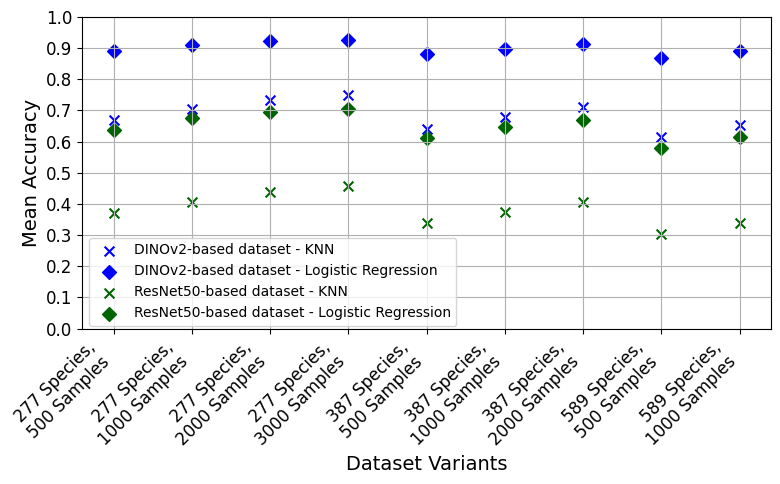

In [ ]:
# Define colors for the models
colors = {
    'DINOv2 - KNN': 'blue',
    'ResNet50 - KNN': 'darkgreen',
    'DINOv2 - Linear Classifier': 'blue',
    'ResNet50 - Linear Classifier': 'darkgreen'
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the lines for each combination of dataset variants and foundational models
for fm in ['DINOv2', 'ResNet50']:
    for model in ['KNN', 'Linear Classifier']:
        fakelabel = f'{fm} - {model}'
        color = colors[fakelabel]
        
        subset = averaged_result_df[(averaged_result_df['Model'] == model) & 
                                                  (averaged_result_df['FoundationalModel'] == fm)]
        
        # Sort the subset by SpeciesAmount and SampleAmount
        subset = subset.sort_values(['SpeciesAmount', 'SampleAmount'])
        
        # Adjust x-values for scatter points
        x_values = np.arange(len(subset))
        
        # Plot the mean accuracy
        ax.scatter(x_values, subset['Mean Accuracy'],
                   label=f'{fm}-based dataset - {"KNN" if model == "KNN" else "Logistic Regression"}',
                   color=color,
                   marker='x' if model == 'KNN' else 'D',
                   s=50)

# X-axis labels
xtick_labels = [f'{species} Species,\n{samples} Samples' for species, samples in zip(subset['SpeciesAmount'], subset['SampleAmount'])]

ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Labels and title
ax.set_xlabel('Dataset Variants')
ax.set_ylabel('Mean Accuracy')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='center left', bbox_to_anchor=(0, 0.15))

plt.yticks(np.arange(0, 1.05, 0.1))
plt.tight_layout()
plt.grid()
plt.show()


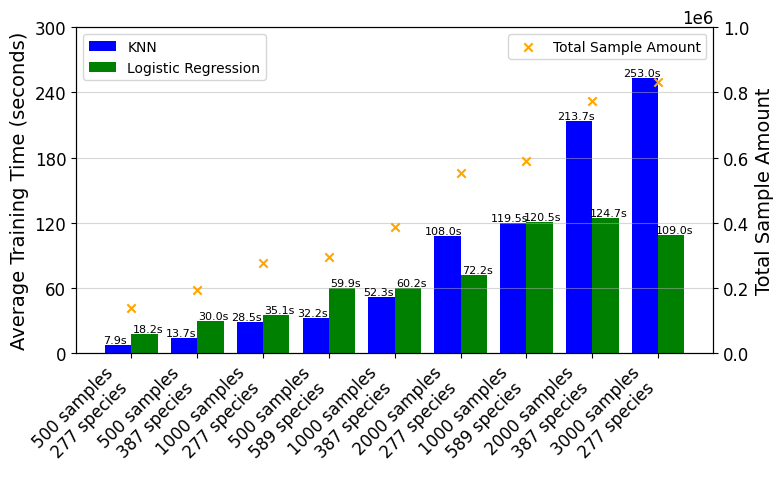

In [ ]:

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Define colors for the models
colors = {
    'KNN': 'blue',
    'Linear Classifier': 'green'
}

# Calculate total samples
averaged_result_df['Total Samples'] = averaged_result_df['SpeciesAmount'] * averaged_result_df['SampleAmount']

# Sort the data by total samples
avg_training_time = averaged_result_df[['SpeciesAmount', 'SampleAmount', 'Total Samples', 'Model', 'Mean Training Time']].sort_values(by='Total Samples').drop_duplicates()

# Plot bars for KNN
knn_data = avg_training_time[avg_training_time['Model'] == 'KNN']

# Calculate the bar width and positions
bar_width = 0.4
positions = np.arange(len(knn_data))

bars_knn = ax1.bar(positions - bar_width/2, knn_data['Mean Training Time'], bar_width, label='KNN', color=colors['KNN'])

# Plot bars for Linear Classifier
linear_data = avg_training_time[avg_training_time['Model'] == 'Linear Classifier']
bars_linear = ax1.bar(positions + bar_width/2, linear_data['Mean Training Time'], bar_width, label='Logistic Regression', color=colors['Linear Classifier'])

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot orange dots for total samples
ax2.scatter(positions, knn_data['Total Samples'], color='orange', zorder=5, label='Total Sample Amount', marker='x')

# Set the y-axis limits and ticks
ax1.set_ylim(0, 300)
ax2.set_ylim(0, 1_000_000)
ax1.set_yticks(np.arange(0, 301, 60))
ax2.set_yticks(np.arange(0, 1_000_001, 200_000))

# Customize the plot
ax1.set_ylabel('Average Training Time (seconds)')
ax2.set_ylabel('Total Sample Amount')
ax1.set_xticks(positions)
ax1.set_xticklabels([f"{row['SampleAmount']} samples\n{row['SpeciesAmount']} species" 
                    for _, row in knn_data.iterrows()], 
                   rotation=45, ha='right')

ax1.grid(True, axis='y', alpha=0.5)

# Add value labels on top of each bar
for idx, bars in enumerate([bars_knn, bars_linear]):
    offset = -0.05 if idx == 0 else 0.05

    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2. + offset, height,
                f'{height:.1f}s',
                ha='center', va='bottom', size=8)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
